#Fraudulent Detection

#Business Context
This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model.

#Problem Statement

The financial industry is increasingly vulnerable to fraudulent transactions due to the rapid expansion of digital payments. The goal of this project is to develop a machine learning model to proactively detect fraudulent transactions using historical transaction data from a financial institution.

The dataset consists of over 6.3 million records with details such as transaction type, amount, balances of the sender and receiver, and fraud indicators. Each record represents a single transaction.

Our objective is to:

Build an effective classification model that identifies fraudulent behavior with high precision and recall.

Perform comprehensive data analysis to uncover trends and correlations associated with fraud.

Select and engineer relevant features that improve the model's accuracy.

Interpret the model outputs to identify key fraud indicators and recommend actionable business strategies.

Ultimately, the aim is to assist the financial company in mitigating fraud risk by implementing data-driven prevention techniques, refining infrastructure, and improving transaction monitoring.



#Let's Begin



### **About Data**
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig **- new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest**  - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest**- new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### import library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


###import data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [ ]:
# copy data so that original data will be intacted
original_data=df.copy()

### Understand Data

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


### Data Vizualization

In [ ]:
# import seaborn as sns
# sns.barplot(x='type', y='amount', data=df)

### Data cleaning

#### 1. Check for Missing Values

In [ ]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])


Missing Values:
 Series([], dtype: int64)


 The dataset is known to not contain nulls, but we verify just to be sure

####2. Remove Irrelevant Columns



    nameOrig and nameDest are IDs — they are not useful directly in ML models.
    Remove if not used in advanced feature engineering.

    nameOrig - customer who started the transaction
    nameDest - customer who is the recipient of the transaction


In [ ]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)


### Feature Engineering



Creating new features such as **balance_delta_orig** and **balance_delta_dest** can provide valuable insights into sudden changes in balances, which are often key indicators of potential fraud

we can create features like balance_delta_orig = oldbalanceOrg - newbalanceOrig and balance_delta_dest = oldbalanceDest - newbalanceDest, which measure sudden changes in balances.
it can lead over fitting so i am skipping it

In [ ]:
df['balance_delta_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balance_delta_dest'] = df['oldbalanceDest'] - df['newbalanceDest']

#### Encoding


###### Which Encoding Technique to Use?
Since the type column does not imply any order, here are your options:

1. Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])
✅ Pros:

Fast, simple, and memory-efficient.

Keeps number of features low.

❌ Cons:

Imposes false ordinal relationship (e.g., 'CASH_IN' = 0 < 'TRANSFER' = 1), which might mislead some models (like logistic regression or linear models).

✅ Best for: Tree-based models (e.g., Random Forest, XGBoost) — they don’t care about order.

2. One-Hot Encoding

df = pd.get_dummies(df, columns=['type'], drop_first=True)
✅ Pros:

No false ordinal relationship.

Ideal for linear models like Logistic Regression, SVM, etc.

❌ Cons:

Increases dimensionality (not a big issue here — only 5 transaction types).

✅ Best for: Linear models or when feature interpretability matters.

✅ Recommendation Based on Model Type:
Model Type	Preferred Encoding
Tree-based (RF, XGBoost)	Label Encoding ✅
Linear (LogReg, SVM)	One-Hot Encoding ✅

#### let's use Label encoding

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_delta_orig,balance_delta_dest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit and transform the 'type' column
df['type_encoded'] = le.fit_transform(df['type'])

# Optional: Drop the original column if not needed
df.drop('type', axis=1, inplace=True)

# View the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Transaction Type Mapping:", label_mapping)


Transaction Type Mapping: {'CASH_IN': np.int64(0), 'CASH_OUT': np.int64(1), 'DEBIT': np.int64(2), 'PAYMENT': np.int64(3), 'TRANSFER': np.int64(4)}


    using label encoding i mapped
    1.CASH_IN :0
    2.CASH_OUT:1
    3.DEBIT:2
    4.PAYMENT:3
    5.TRANSFER:4

In [ ]:
df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'balance_delta_orig',
       'balance_delta_dest', 'type_encoded'],
      dtype='object')

#### Balancing the data using smote technique

In [ ]:
df['isFraud'].value_counts()


,count
isFraud,
0,6354407
1,8213


In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_delta_orig,balance_delta_dest,type_encoded
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0,3
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0,3
2,1,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0,4
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,21182.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0,3


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Drop identifier columns (if any), and separate features and target
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']



apply Smote technique in only 70 percent of the training data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check the class balance
print(y_train_resampled.value_counts())


isFraud
0    4448056
1    4448056
Name: count, dtype: int64


applying smote in all data

In [ ]:
# sm = SMOTE(random_state=42)
# X_resampled, y_resampled = sm.fit_resample(X, y)

# # Confirm the balance
# print(y_resampled.value_counts())


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
#rf = RandomForestClassifier(n_estimators=10, random_state=42,n_jobs=-1)
rf = RandomForestClassifier(n_estimators=10, max_depth=3, n_jobs=-1, random_state=42)
# Fit the model on the SMOTE-balanced training data
rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=3, n_estimators=10, n_jobs=-1, random_state=42)

In [ ]:
# Predict on original (unbalanced) test set
y_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# AUC-ROC Score
y_pred_proba = rf.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
 [[1798858  107493]
 [    151    2284]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9436    0.9709   1906351
           1     0.0208    0.9380    0.0407      2435

    accuracy                         0.9436   1908786
   macro avg     0.5104    0.9408    0.5058   1908786
weighted avg     0.9987    0.9436    0.9698   1908786

ROC-AUC Score: 0.9851922617545721


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# AUC-ROC Score
y_pred_proba = rf.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Confusion Matrix:
 [[1798858  107493]
 [    151    2284]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9436    0.9709   1906351
           1     0.0208    0.9380    0.0407      2435

    accuracy                         0.9436   1908786
   macro avg     0.5104    0.9408    0.5058   1908786
weighted avg     0.9987    0.9436    0.9698   1908786

ROC-AUC Score: 0.9851922617545721


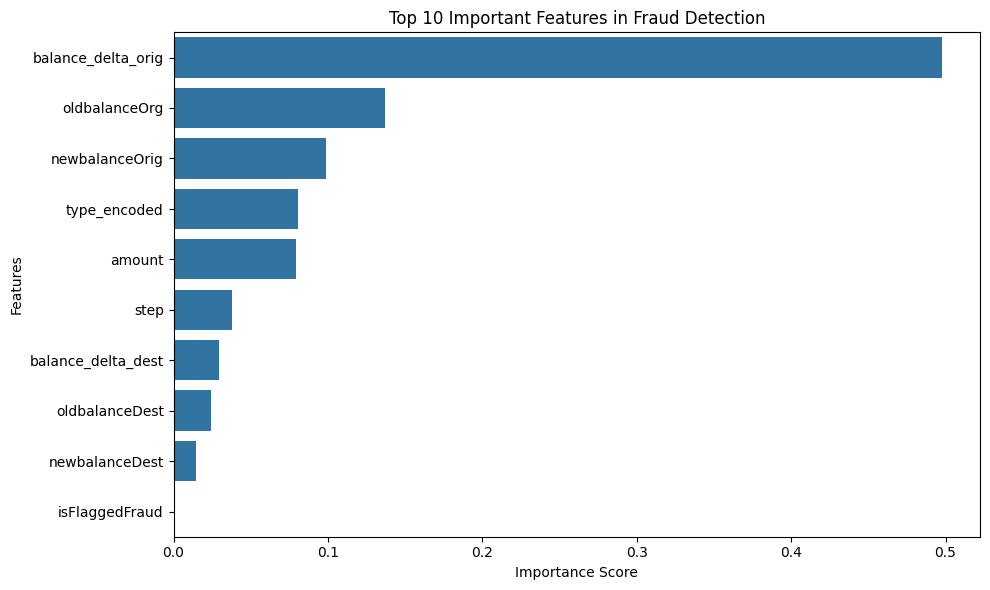

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Important Features in Fraud Detection")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [ ]:
# prompt: hyper pyrameter tuning of random forest

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
# n_iter controls the number of parameter combinations sampled.
# cv is the number of cross-validation folds.
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1, scoring='roc_auc')

# Fit the random search to the resampled data
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best ROC-AUC score found: ", random_search.best_score_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the original test set
y_pred_best = best_rf_model.predict(X_test)
y_pred_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

print("\nEvaluation on original Test Set with Best Model:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_best))



KeyboardInterrupt: 

Since the Data Set is very lage so i coudn't perform random search cv because it taking to much time

### XGBoost

Why XGBoost here? Faster training on large datasets

Handles imbalance with scale_pos_weight

Often more accurate and interpretable

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Initialize XGBoost classifier with scale_pos_weight to handle imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_clf = xgb.XGBClassifier(
    n_estimators=50,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)

# Fit on original imbalanced training data (or you can use SMOTE data if preferred)
xgb_clf.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Evaluate
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0     1.0000    0.9924    0.9962   1906351
           1     0.1437    0.9938    0.2511      2435

    accuracy                         0.9924   1908786
   macro avg     0.5718    0.9931    0.6237   1908786
weighted avg     0.9989    0.9924    0.9952   1908786

ROC-AUC Score: 0.9991071086746107


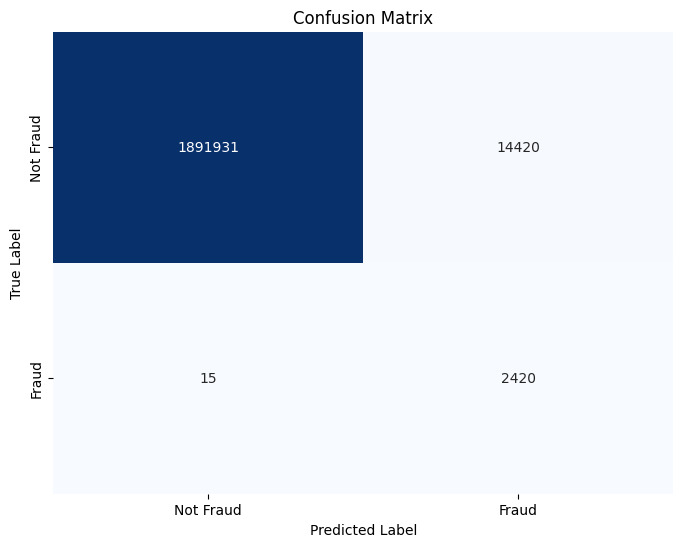

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

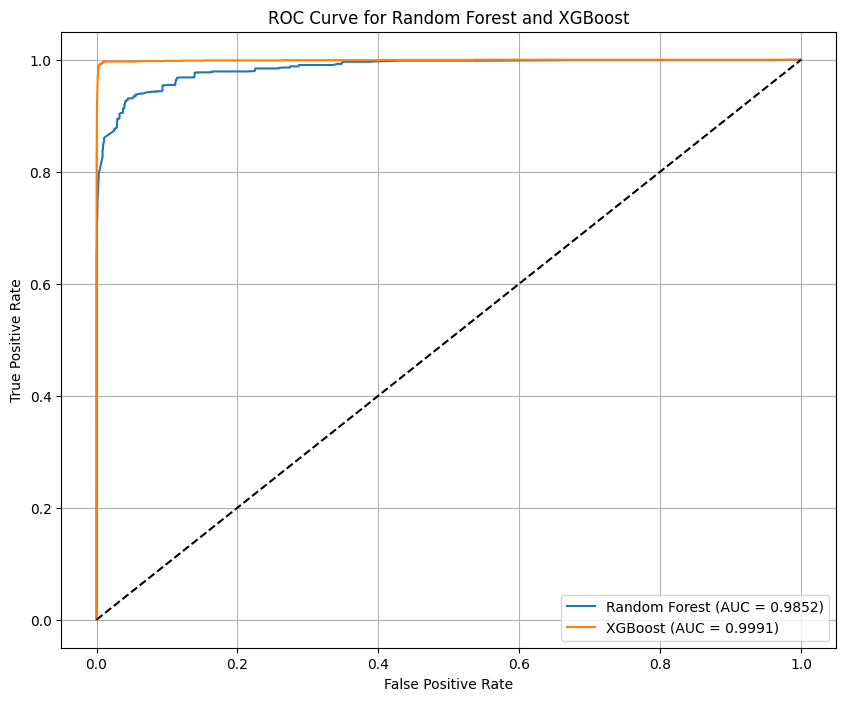

In [ ]:
# prompt: plot aucroc for both model random forest and Xgboost

# Plot AUC-ROC curve for both models

# Use the already trained rf model instead of best_rf_model
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)

auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest and XGBoost')
plt.legend()
plt.grid(True)
plt.show()

#### Logistic Regression

one hot encoding is prefable

df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [ ]:
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Check the class balance
print(y_train_bal.value_counts())

In [ ]:
X_train_resampled

In [ ]:
# Use your SMOTE-balanced data
X_train_resampled, y_train_resampled


In [ ]:
X_test, y_test


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=100, random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# prompt: apply threshold

# You can adjust the threshold to optimize precision or recall
threshold = 0.3

# Predict using the custom threshold
y_pred_threshold = (logreg.predict_proba(X_test_scaled)[:, 1] >= threshold).astype(int)

# Evaluate with the new threshold
print(f"\nClassification Report with Threshold = {threshold}:\n", classification_report(y_test, y_pred_threshold, digits=4))

# Confusion Matrix with the new threshold
cm_threshold = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm_threshold, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix with Threshold = {threshold}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC Curve to see the trade-off
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


###### insights
Confusion Matrix Breakdown
Predicted: 0	Predicted: 1
Actual: 0 (non-fraud)	1,826,299 ✅ (TN)	80,023 ❌ (FP)
Actual: 1 (fraud)	85 ❌ (FN)	2,379 ✅ (TP)

✅ What It Means:
True Negatives (TN) = 1,826,299
→ Non-fraud transactions correctly predicted as non-fraud.

False Positives (FP) = 80,023
→ Non-fraud transactions wrongly predicted as fraud (can affect customer experience or cause unnecessary alerts).

True Positives (TP) = 2,379
→ Fraud transactions correctly predicted as fraud ✅ (this is your model's goal).

False Negatives (FN) = 85
→ Fraud transactions missed by the model ❌ (these are dangerous).

📊 Key Metrics
Let me break it down using this confusion matrix:

1. Accuracy
=
𝑇
𝑁
+
𝑇
𝑃
𝑇
𝑜
𝑡
𝑎
𝑙
=
1826299
+
2379
1826299
+
80023
+
85
+
2379
≈
95.7
%
=
Total
TN+TP
​
 =
1826299+80023+85+2379
1826299+2379
​
 ≈95.7%
✅ High, but can be misleading in imbalanced datasets.

2. Precision (Fraud Detection)
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
=
2379
2379
+
80023
≈
2.9
%
=
TP+FP
TP
​
 =
2379+80023
2379
​
 ≈2.9%
⚠️ Very low — out of all transactions marked as fraud, most were actually not.

3. Recall (Fraud Coverage)
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
=
2379
2379
+
85
≈
96.5
%
=
TP+FN
TP
​
 =
2379+85
2379
​
 ≈96.5%
✅ Very high — the model captures almost all actual frauds.

4. F1 Score (Balance of precision & recall)
=
2
×
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
×
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
+
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
≈
5.7
%
=2×
Precision+Recall
Precision×Recall
​
 ≈5.7%
⚠️ Still low — mainly because of poor precision.

🧠 Interpretation
Your model is excellent at detecting frauds (high recall).

But it's also flagging too many normal transactions as fraud (low precision), which can be costly in real-world scenarios (customer complaints, investigations).

This might be due to class imbalance, feature limitations, or threshold not being optimized.

🔧 Suggestions for Improvement
Threshold Tuning:
Adjust decision threshold (default is 0.5) to balance precision & recall.

Use ROC/Precision-Recall Curve:
Plot and find optimal cut-off point.

Try Different Models:
Random Forest, XGBoost often perform better in such imbalanced cases.

Feature Engineering:
Add useful derived features (like balance deltas, transaction types, etc.).

Resampling + Ensemble:
Combine SMOTE + RandomForest/XGBoost with undersampling non-fraud if needed.

In [ ]:
# prompt: change threshold

# Adjusting the classification threshold
# Let's find a threshold that gives a better balance between precision and recall,
# or prioritizes precision more, depending on the business goal (reducing false positives).

# You need the predicted probabilities for the positive class (fraud)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# You can calculate precision and recall for various thresholds
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# You can choose a threshold based on the curve or a specific target (e.g., aiming for 50% precision)
# Let's pick a threshold, for example, where precision is higher than before.
# You would inspect the 'thresholds', 'precision', and 'recall' arrays to find a suitable value.

# Example: Find a threshold that gives at least 50% precision
# This is just an example, you would visually inspect the plot or iterate through the arrays
# to find a threshold that meets your business objective.
# Let's find the threshold where precision is closest to 0.5, but recall is still acceptable.
target_precision = 0.5
# Find the index where precision is >= target_precision for the first time (from higher recall)
try:
    idx = next(i for i, p in enumerate(precision[::-1]) if p >= target_precision)
    optimal_threshold = thresholds[len(thresholds) - 1 - idx]
except StopIteration:
    # If no threshold achieves target_precision, choose the highest one
    optimal_threshold = thresholds[-1] if len(thresholds) > 0 else 0.5

print(f"\nChoosing a new threshold: {optimal_threshold:.4f}")

# Now apply the new threshold to predict
y_pred_new_threshold = (y_proba >= optimal_threshold).astype(int)

# Evaluate with the new threshold
print("\nClassification Report with New Threshold:")
print(classification_report(y_test, y_pred_new_threshold, digits=4))

cm_new = confusion_matrix(y_test, y_pred_new_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Threshold: {optimal_threshold:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compare the confusion matrix and metrics to the previous one (using default 0.5 threshold)
# You should see fewer False Positives (improved precision) at the cost of potentially more False Negatives (reduced recall).
# The choice of threshold depends on the cost of False Positives vs. False Negatives for the financial company.

In [ ]:
# Apply custom threshold
best_threshold =0.99
y_pred_custom = (y_scores > best_threshold).astype(int)

# Evaluate new predictions
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# prompt: Draw auc roc curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, classification_report

# Predict probabilities
y_probs = logreg.predict_proba(X_test)[:, 1]

# Get precision-recall values
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1 for all thresholds
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Find best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print("Best Threshold =", best_threshold)
print("Best F1 Score =", f1_scores[best_idx])

# Evaluate model at best threshold
y_pred_opt = (y_probs >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_opt))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Apply 0.95 threshold
threshold = 0.95
y_pred_095 = (y_probs >= threshold).astype(int)

# Evaluation
print("Classification Report (Threshold = 0.95):")
print(classification_report(y_test, y_pred_095))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_095)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix at Threshold = {threshold}")
plt.show()
